# Maximum Likelihood Estimation

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import seaborn as sns

%matplotlib inline
sns.set()

## Normal Distribution

In [3]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

In [4]:
def normal_mu_MLE(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma_MLE(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu_MLE(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

In [5]:
print ("Mean Estimation")
print (normal_mu_MLE(X))
print (np.mean(X))
print ("\nStandard Deviation Estimation")
print (normal_sigma_MLE(X))
print (np.std(X))

Mean Estimation
39.912182809648336
39.912182809648336

Standard Deviation Estimation
10.189035823551452
10.18903582355146


In [6]:
mu, std = scipy.stats.norm.fit(X)
print ("mu estimate: " + str(mu))
print ("std estimate: " + str(std))

mu estimate: 39.912182809648336
std estimate: 10.18903582355146


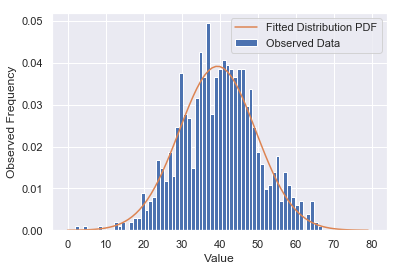

In [10]:
pdf = scipy.stats.norm.pdf
# We would like to plot our data along an x-axis ranging from 0-80 with 80 intervals
# (increments of 1)
x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, density='true')
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

## Exponential Distribution

In [11]:
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

In [12]:
def exp_lamda_MLE(X):
    T = len(X)
    s = sum(X)
    return s/T

In [13]:
print ("lambda estimate: " + str(exp_lamda_MLE(X)))

lambda estimate: 4.994206623498937


In [14]:
# The scipy version of the exponential distribution has a location parameter
# that can skew the distribution. We ignore this by fixing the location
# parameter to 0 with floc=0
_, l = scipy.stats.expon.fit(X, floc=0)

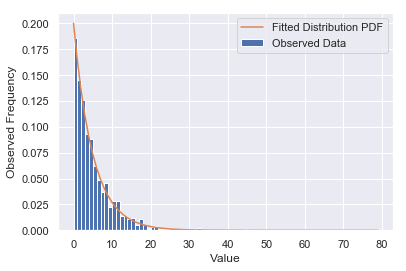

In [16]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, density='true')
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

## MLE for Asset Returns

In [17]:
import fix_yahoo_finance as yf
from datetime import datetime
start="2008-01-01"
end=datetime.now().strftime ("%Y-%m-%d")

In [18]:
MERCK = yf.download('MERCK.NS', start=start, end=end)
prices = MERCK['Adj Close']

# This will give us the number of dollars returned each day
absolute_returns = np.diff(prices)

# This will give us the percentage return over the last day's value
# the [:-1] notation gives us all but the last item in the array
# We do this because there are no returns on the final price in the array.
returns = absolute_returns/prices[:-1]

[*********************100%***********************]  1 of 1 downloaded


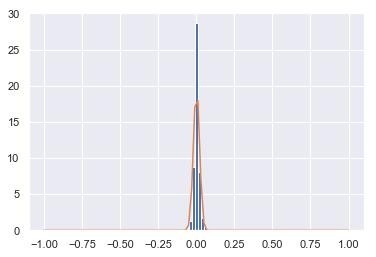

In [21]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
h = plt.hist(returns, bins=x, density='true')
l = plt.plot(x, pdf(x, loc=mu, scale=std))

Of course, this fit is meaningless unless we've tested that they obey a normal distribution first. We can test this using the Jarque-Bera normality test. The Jarque-Bera test will reject the hypothesis of a normal distribution if the p-value is under a c.

In [22]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(returns)

(55798.64457069528, 0.0, 2.51884201231097, 24.464108077561313)

In [23]:
jarque_bera(np.random.normal(0, 1, 100))

(0.09945134620945464,
 0.9514904081112044,
 0.07570281123778178,
 3.0307353310223957)